In [769]:
from IPython.core.magic import register_line_magic, register_cell_magic
from IPython.display import Video

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, accuracy_score, log_loss
from scipy.optimize import curve_fit


from sklearn.neighbors import KNeighborsClassifier
@register_line_magic
def embed(f_path):
    return Video(f_path,width=1000)

In [650]:
def train_test_split_pandas(df, x_cols=[],y_cols=[], test=0.2):
    '''
    split dataframe into train_test, 
    
    if no x_cols or y_col is supplied, then the dataframe will just be split into train_test df
    
    if x_cols and y_cols is supplied it will return 4 arrays, train_x, test_x, train_y, test_y
    
    '''
    
    
    train_df = df.sample(int((1-test)*len(df)))
    test_df = df[~df.index.isin(train_df.index)]
    if not x_cols:
        return train_df, test_df

    else:
        return train_df[x_cols].to_numpy(),train_df[y_cols].to_numpy().ravel(),test_df[x_cols].to_numpy(),test_df[y_cols].to_numpy().ravel()


fuel_df_train, fuel_df_test = train_test_split_pandas(fuel_df)
#len(fuel_df)

# Regression



## Simple Linear Regression


In [21]:
%embed week2_regression/SimpleLinearReg.mp4

In [22]:
%embed week2_regression/ModelEvaluation.mp4

In [23]:
%embed week2_regression/EvaluationMetrics.mp4

In [84]:
fuel_df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

# take a look at the dataset
fuel_df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [85]:
fuel_df_train_x, fuel_df_train_y, fuel_df_test_x, fuel_df_test_y = train_test_split_pandas(fuel_df,x_cols=['ENGINESIZE'],y_cols=['CO2EMISSIONS'])

Coefficients:  39.09488616073157
Intercept:  126.03442615893024


Text(0.5, 1.0, 'y = 39.09X + 126.03 predicts train set with r2=0.70 and test set with r2=0.65')

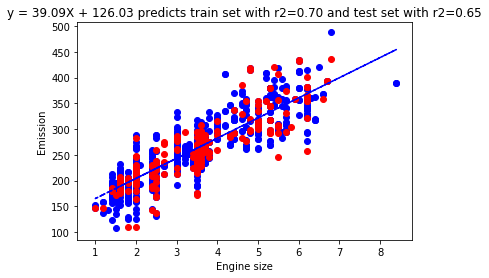

In [101]:
regr = linear_model.LinearRegression()



regr.fit (fuel_df_train_x,fuel_df_train_y)
# The coefficients
print ('Coefficients: ', regr.coef_[0][0])
print ('Intercept: ',regr.intercept_[0])

##could have more than one coefficient if its a multi-linear regression
coefficient = regr.coef_[0][0]
y_intercept = regr.intercept_[0]
#coefficient, y_intercept
#y_hat = mx+b

#returns array of y values
y_line = coefficient*fuel_df_train_x + y_intercept 


##In this case we did not do a train_test_split
#y_hat_test = y_hat_train

y_hat_test = regr.predict(fuel_df_test_x)
y_hat_train = regr.predict(fuel_df_train_x)

# print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - train_y)))
# print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - train_y) ** 2))
# print("R2-score: %.2f" % r2_score(y_hat , train_y) )

# print("\nMean absolute error: %.2f" % mean_absolute_error(y_hat, train_y))
# print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_hat, train_y))


#Plot test scatter
plt.scatter(fuel_df_train_x, fuel_df_train_y,  color='blue')

#Plot least squared line through scatter
plt.plot(fuel_df_train_x, y_line,'--b')

#Plot scatter of test set
plt.scatter(fuel_df_test_x, fuel_df_test_y,  color='red')

# plt.plot(train_x, y_line, '--r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

r2_train = r2_score(y_hat_train,fuel_df_train_y)
r2_test = r2_score(y_hat_test, fuel_df_test_y)
plt.title('y = {:.2f}X + {:.2f} predicts train set with r2={:.2f} and test set with r2={:.2f}'.format(coefficient,y_intercept,r2_train,r2_test))

## Multiple Linear Regression

In [25]:
%embed week2_regression/MultipleLinearRegression.mp4

In [209]:
def get_matplotlib_equation(regr,x_cols):
    coeffiencts = regr.coef_
    intercepts = regr.intercept_
    equation = []
    for coef, label in zip(coeffiencts[0],x_cols):
        equation.append(r'{:.2f}$x_{{{}}}$'.format(coef,label))
    equation.append("{:.2f}".format(intercepts[0]))
    return 'y='+'+'.join(equation)

mult_regr = linear_model.LinearRegression()

x_cols = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']
y_cols = ['CO2EMISSIONS']


##train test split on pandas and get array
f_train_x, f_train_y, f_test_x, f_test_y =train_test_split_pandas(fuel_df,x_cols=x_cols, y_cols=y_cols)

##Fit
multi_regr = mult_regr.fit(f_train_x,f_train_y)

#get y_hat of train_set
y_hat_train = multi_regr.predict(f_train_x)
#residual error from the line fit through mutliple dimensions1
r2_train = r2_score(y_hat_train,f_train_y)

#get Y_hat of test_set
y_hat_test = multi_regr.predict(f_test_x)
r2_test = r2_score(y_hat_test,f_test_y)

print('Equation {}\nr2train- {:.2f}\nr2test- {:.2f}'.format(
    get_matplotlib_equation(multi_regr,x_cols),
    r2_train,
    r2_test))

Equation y=11.56$x_{ENGINESIZE}$+6.64$x_{CYLINDERS}$+5.23$x_{FUELCONSUMPTION_CITY}$+4.57$x_{FUELCONSUMPTION_HWY}$+66.61
r2train- 0.85
r2test- 0.82


## Polynomial and Non-Linear Regression

In [24]:
%embed week2_regression/NonLinearRegression.mp4

### Polynomial Regression 


- Also in Non Linear Regression video

This referrs to when you are trying to plot a single dimension and the fit throught he f(x) = x is not linear, you can transform your single X into an [1,x,x^2] and then do a multi regression.

---From Coursera
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 


**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

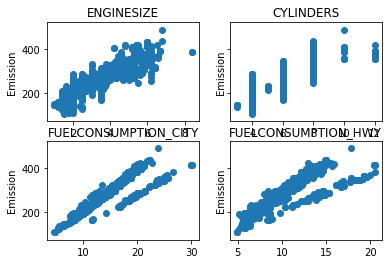

In [229]:
##Can we fit a polynomial through these?

x_cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']
fig, axes = plt.subplots(2, 2, sharex=False, sharey=True)

for x_col, ax in zip(x_cols,axes.flat):
    ax.scatter(fuel_df[x_col], fuel_df.CO2EMISSIONS)
    #ax.set_xlabel(x_col)
    ax.set_ylabel("Emission")
    ax.set_title(x_col)
    

In [235]:
##fit transform takes X input and applies polynomial transformation
poly = PolynomialFeatures(degree=2)

x_cols = ['ENGINESIZE']#,'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']
y_cols = ['CO2EMISSIONS']
f_train_x, f_train_y, f_test_x, f_test_y =train_test_split_pandas(fuel_df,x_cols=x_cols, y_cols=y_cols)

#transfomrs a 1 d x into an ndegree polynomial
print("Before\n",f_train_x[:5])
f_train_x_poly = poly.fit_transform(f_train_x)
print("After\n",f_train_x_poly[:5])

Before
 [[1.6]
 [2.5]
 [3.8]
 [2. ]
 [2.4]]
After
 [[ 1.    1.6   2.56]
 [ 1.    2.5   6.25]
 [ 1.    3.8  14.44]
 [ 1.    2.    4.  ]
 [ 1.    2.4   5.76]]


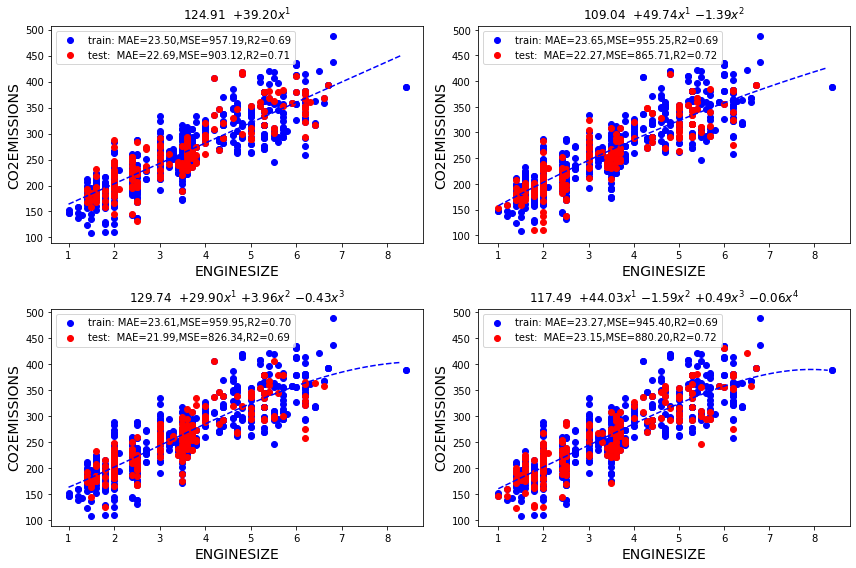

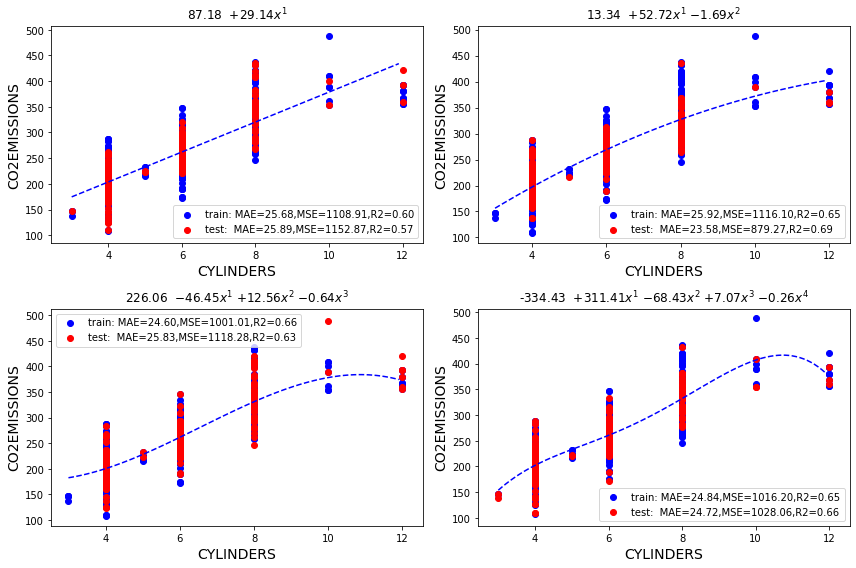

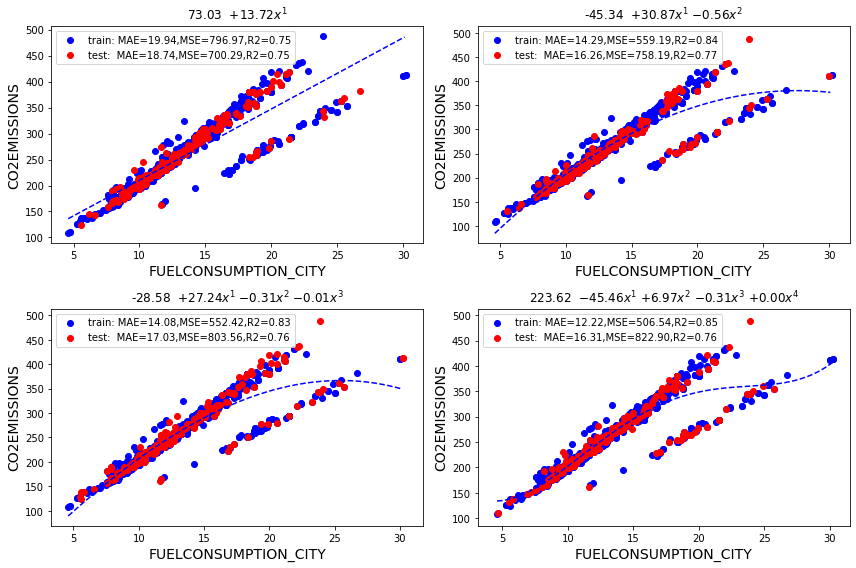

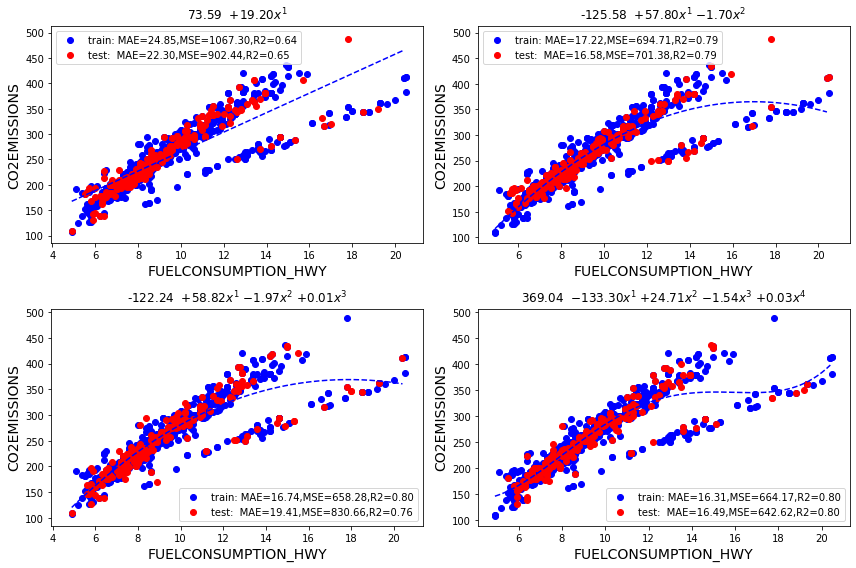

In [309]:
def fit_poly(df, degree,x_var,y_var,ax=""):
    '''
    fit on polynomial regression, supply dataframe, x_variable, and dependent variable
    
    '''
    
    train_x, train_y, test_x, test_y = train_test_split_pandas(df,x_cols=[x_var], y_cols=[y_var])
    
    poly = PolynomialFeatures(degree=degree)
    
    #transform single x var to polynomial
    train_x_poly = poly.fit_transform(train_x)
    test_x_poly = poly.fit_transform(test_x)


    regression = linear_model.LinearRegression()
    regression.fit(train_x_poly, train_y)
    
    #get y_output
    y_hat_train = regression.predict(train_x_poly)
    y_hat_test = regression.predict(test_x_poly)
    
    ##figure out line
    coeffieints = regression.coef_[0][1:]
    
    ##XX range is continuous for the line
    XX = np.arange(df[x_var].min(), df[x_var].max(), 0.1)
    
    ##get y_intercept
    y_intercept = regression.intercept_[0]
    
    
    #mean_average_error for test and training set
    mae_train = np.mean(np.absolute(y_hat_train - train_y))
    mae_test = np.mean(np.absolute(y_hat_test - test_y))

    
    #mean squared error for test and trainint
    mse_train = np.mean((y_hat_train - train_y) ** 2)
    mse_test = np.mean((y_hat_test - test_y) ** 2)
    
    #mean residual error
    r2_train = r2_score(y_hat_train,train_y)
    r2_test = r2_score(y_hat_test,test_y)


    #get a string format of the equation
    le = r'{:.2f} '.format(y_intercept)
    for power,coef in enumerate(coeffieints,start=1):
        if coef > 0:
             le += ' +'
        else:
             le += ' '
        le += r'${:.2f}x^{}$'.format(coef,power)
        
    
    #Plot
    #y = y_intercept + c1*x + c2x^2 ...
    YY = y_intercept
    
    for power,coefficient in enumerate(coeffieints,start=1):
        YY+= coefficient*np.power(XX,power)
    
    if not ax:
        fig = plt.figure(figsize=(12,8))
        ax = fig.gca()
    #Plot the test data --!Not the polynomial
    ax.scatter(train_x, train_y,  color='blue',label="train: MAE={:.2f},MSE={:.2f},R2={:.2f}".format(mae_train,mse_train,r2_train))
    ax.scatter(test_x, test_y,  color='red',label="test:  MAE={:.2f},MSE={:.2f},R2={:.2f}".format(mae_test,mse_test,r2_test))

    #Plot the polynomial line
    ax.plot(XX, YY, '--b')
    ax.set_title("{}".format(le))
    ax.legend()
    ax.set_xlabel(x_var,size=14)
    ax.set_ylabel(y_var,size=14)
    
    

#Lets go through the columns and plot four degrees each
for col in ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']:
    fig, axes = plt.subplots(2, 2, sharex=False, sharey=False,figsize=(12,8))
    fit_poly(fuel_df,1,col,'CO2EMISSIONS',ax=axes[0][0])
    fit_poly(fuel_df,2,col,'CO2EMISSIONS',ax=axes[0][1])
    fit_poly(fuel_df,3,col,'CO2EMISSIONS',ax=axes[1][0])
    fit_poly(fuel_df,4,col,'CO2EMISSIONS',ax=axes[1][1])
    plt.tight_layout()

### Non Linear Regression

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$
    
Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

- Quadratic

$$ Y = X^2 $$

- Exponetial

 An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 


- Logarithmic

     The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of __log()__: i.e. $$ y = \log(x)$$

     Please consider that instead of $x$, we can use $X$, which can be polynomial representation of the $x$'s. In general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}

- Sigmoid/Logistic 
$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [415]:
##Define some functions that may fit the regression which has some optional parameters

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

def exponential(x,alpha, beta,gamma):
    y = alpha + beta*gamma**x
    return y

def quadratic(x,beta):
    return beta*x**2



Text(0.5, 1.0, 'pre MSE 0.2254 post MSE 0.0014')

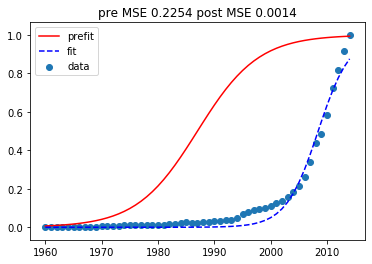

In [588]:
china_df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv")
china_df.head(10)



#has to be one dimensional array in curve fit
train_x = china_df[['Year']]
train_y = china_df[['Value']]

#Must reshape these because it needs to be N, dimension, i.e no rows
year_normalizer = preprocessing.MinMaxScaler().fit(train_x)
value_normalizer = preprocessing.MinMaxScaler().fit(train_y)
train_x_normal = year_normalizer.transform(train_x).reshape((len(train_x),))
train_y_normal = value_normalizer.transform(train_y).reshape((len(train_y),))

plt.scatter(train_x,train_y_normal,label='data')


##Inital_fit
#Just played with these until somthing looked okay
beta_1 = 10
beta_2 = 0.5
y_random_fit = sigmoid(train_x_normal,beta_1,beta_2)
#y_random_fit = value_normalizer.inverse_transform(y_random_fit.reshape(1,-1)).transpose()

#Plot before fitt
plt.plot(train_x.values,y_random_fit,color='red',label='prefit')


#curve fit will take in a general function and give you the *popt
##Assumes ``ydata = f(xdata, *params) + eps``
###so first parameter will be function, then x_data to fit _y_data. It will return *params that optimize the least squared fit
'''
def func(x, a, b, c):
...     return a * np.exp(-b * x) + c

popt =  [a,b,c]

# '''

# # # #Pcov is the covariance matrix
popt, pcov = curve_fit(sigmoid,train_x_normal, train_y_normal)
##y_hat will come back normalized
y_hat = sigmoid(train_x_normal,*popt)


plt.plot(train_x,y_hat,'--b',label='fit')
plt.legend()
plt.title('pre MSE {:.4} post MSE {:.4f}'.format(
    mean_squared_error(train_y_normal,y_random_fit),
    mean_squared_error(train_y_normal,y_hat)))


-- R2 doesn't really work for non-linear models...I tried and tried and tried then found [this](https://statisticsbyjim.com/regression/r-squared-invalid-nonlinear-regression/)

# Classification

## KNN

In [590]:
%embed week3_classification/intro_to_class.mp4

In [591]:
%embed week3_classification/k-nearest-neighbors.mp4

In [592]:
%embed week3_classification/evalauation_classification.mp4

**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.


 Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

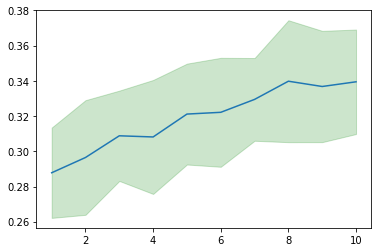

In [823]:
df_phone = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv')


##In this case the classs are aready encoded by numbers so we don't have to transform them
df_phone.head()
df_phone['custcat_category'] = df_phone['custcat'].apply(lambda x: {1:'Not Likely',2:'Maybe',3:'Likely',4:'Moving'}[x])


x_cols = ['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']
#if only 1 column has to be returned as a flattened array via ravel or don't put in []
y_cols = 'custcat'


'''

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.
'''

###will scale relative to the feature and not across features
scale = preprocessing.StandardScaler()
num_repeats = 30
r = []

##Im going to repeat the k with multiple samples each time 30 times
for repeats in range(0,num_repeats):
    train_x, train_y, test_x, test_y = train_test_split_pandas(df_phone,x_cols=x_cols,y_cols=y_cols)
    train_x_normal = scale.fit_transform(train_x)
    test_x_normal = scale.fit_transform(test_x)                                                       
    accuracies = []
    #for each repeat im going to go between 1 and 10 ks
    for k in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_x_normal,train_y)
        
        #give a probability of each classifier of knn._class
        y_hat_prob = knn.predict_proba(test_x_normal)
        
        ##gives the top probability
        y_hat_prediction = knn.predict(test_x_normal)
        y_hat_train = knn.predict(train_x_normal)

        ##Manual way to figure out prediction from probability
        y_hat = []
        for x in range(0,len(y_hat_prob)):
            ##get which value was the maximum and then find out the index of where that max was
            max_ = np.where(y_hat_prob[x]==y_hat_prob[x].max())[0]
           #That index is in reference to what value was in the classes
            y_hat.append(knn.classes_[max_[0]])
        ###Make sure that they actually predicted the same thing as y_hat_prediction
        assert(y_hat_prediction == y_hat).all()

        test_set_accuracy = accuracy_score(y_hat,test_y)
        train_set_accuracey = accuracy_score(y_hat_train,train_y)
        log_loss_test = log_loss(y_hat,y_hat_prob,normalize=True)
        #print("k {}, test accuracey {} train accuracy {} log loss {:.2f}".format(k,test_set_accuracy,train_set_accuracey,log_loss_test))
        accuracies.append(test_set_accuracy)
    r.append(accuracies)

#columns are each k value, rows are each repeat
averages = np.array(r).mean(axis=0)
std= np.array(r).std(axis=0)

##plot average across repeats and std is the deviation between repeats
plt.plot(range(1,11),averages)
plt.fill_between(range(1,11),averages-std,averages+std,alpha=0.2,color='green')

## Decision Trees

In [593]:
%embed week3_classification/decission_trees.mp4

In [830]:
%embed week3_classification/building_decision_trees.mp4

## Logistic Regression

In [595]:
%embed week3_classification/logistic_regression.mp4

In [596]:
%embed week3_classification/logistic_vs_linear.mp4

In [597]:
%embed week3_classification/building_logistic.mp4

## SVM

In [600]:
%embed week3_classification/SVM.mp4